<a href="https://colab.research.google.com/github/Pauline-Zeestraten/skills-introduction-to-github/blob/main/ENews_Express_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

# Problem Statement:  

E-News Express, an online news portal, aims to expand its business by acquiring new subscribers. However, there has been a decline in new monthly subscriptions compared to last year. E-News Express executives suspect this is due to  the current webpage design that fails to engage visitors long enough to make the decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]




# Objectives:

E-News Express design team has researched and created a new landing page that has a new outline and more relevant content compared to the old page.

To test the effectiveness of the new landing page, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. As a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (proportion of users who visit the landing page and subscribe) for the new page greater than for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for different language users?

## Import all the necessary libraries

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


## Reading the Data into a DataFrame

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [7]:
# Read the data:
df = pd.read_csv('/content/drive/MyDrive/DSBA program/Inferential Statistics Foundation/abtest.csv')
# Returns the first 5 rows:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [8]:
# Returns the last 5 rows:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [9]:
# Check the shape of the dataset:
df.shape

(100, 6)

In [6]:
# Check the statistical summary of the numeric columns of the dataset:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [10]:
# Check for missing values:
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [11]:
# Check for duplicate values:
df.duplicated().sum()

np.int64(0)

### Univariate Analysis

**Time on Page**

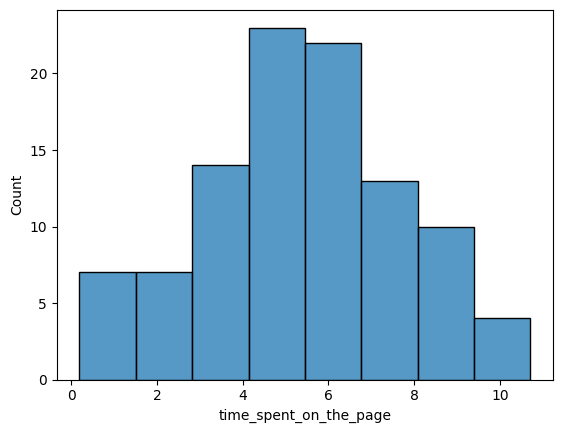

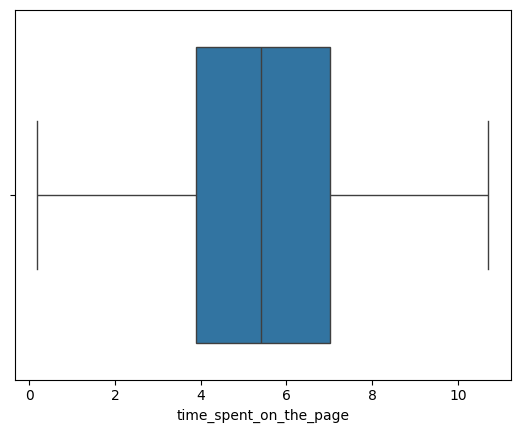

In [12]:
# Create a histogram for time spent on the page:
sns.histplot(data=df, x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df, x='time_spent_on_the_page')
plt.show()

Observation: Appears to be a binomial distribution:  
1. The number of observations is fixed.
2. Each observation is independent.
3. Each observation represents one of two outcomes.
4. the probability (p) of success, one of two outcomes, is the same for each outcome.

We need to further investigate if requirement 4. actually applies here, before we can call it a true binomial distribution.


**Group**

In [13]:
# Create two different arrays for the control and treatment group respectively:
control_group = df.loc[(df['group'] == 'control')]
treatment_group = df.loc[(df['group'] == 'treatment')]

In [14]:
# Write code for statistical summary for control group:
control_group.describe()

,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546566.50000,4.532400
std,17.67767,2.581975
min,546493.00000,0.190000
25%,546555.25000,2.720000
50%,546567.50000,4.380000
75%,546579.75000,6.442500
max,546592.00000,10.300000


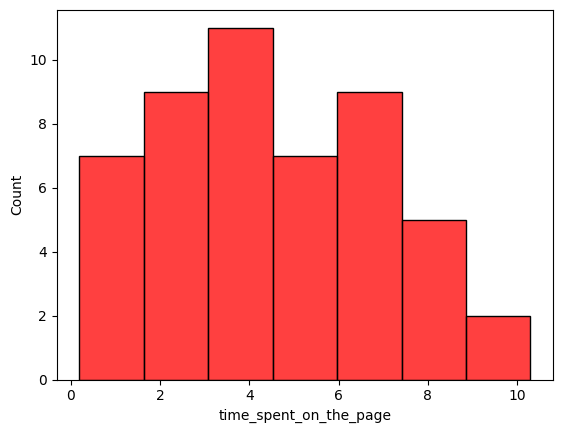

In [15]:
# Create a histogram showing time spent on the page by the control group
sns.histplot(data=df[df['group'] == 'control'], x = 'time_spent_on_the_page', color = 'red')
plt.show()

Observation: No longer normal distribution model.


In [16]:
# Write code for statistical summary for treatment group:
treatment_group.describe()

,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546467.50000,6.223200
std,14.57738,1.817031
min,546443.00000,1.650000
25%,546455.25000,5.175000
50%,546467.50000,6.105000
75%,546479.75000,7.160000
max,546492.00000,10.710000


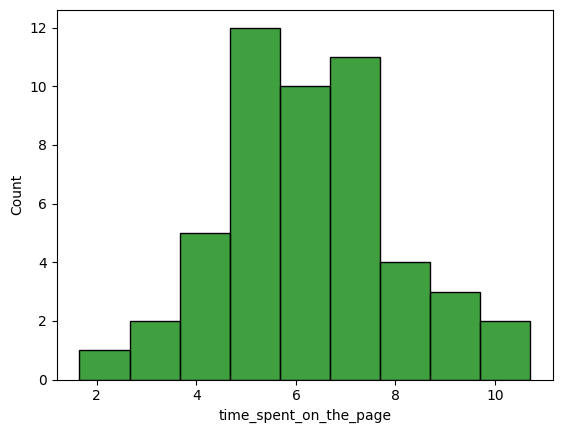

In [17]:
# Create a histogram showing the time spent on page by the treatment group:
sns.histplot(data=df[df['group']=='treatment'], x='time_spent_on_the_page', color='green')
plt.show()

Observation:  Majority of treatment group spends 5 to 7.5 minutes on the new landing page;  The majority of control group spends 4.5 minutes or less.

**Landing Page**

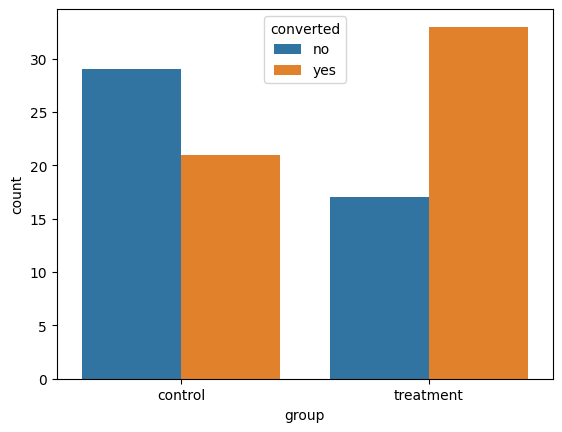

In [18]:
# Create a count plot showing the difference in conversion rates for the two groups:
sns.countplot(data= df, x= 'group', hue='converted')
plt.show()

In [19]:
# Write code that shows how many people converted in the control and treatment group respectively:
df.groupby(df['group'])['converted'].value_counts()

group      converted
control    no           29
           yes          21
treatment  yes          33
           no           17
Name: count, dtype: int64

Observation:  More people converted in the treatment group than in the control group.

**Language Preferred**

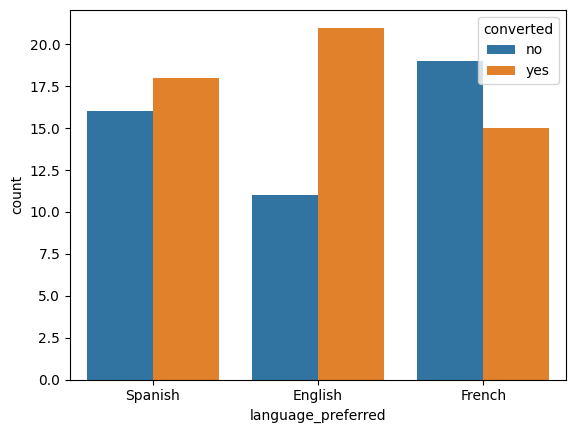

In [20]:
# Create a countplot that shows which language is preferred in the group:
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.show()

Observation:  People converted in higher numbers when they preferred the English language.  

### Bivariate Analysis

**landing_page vs time_spent_on_the_page**

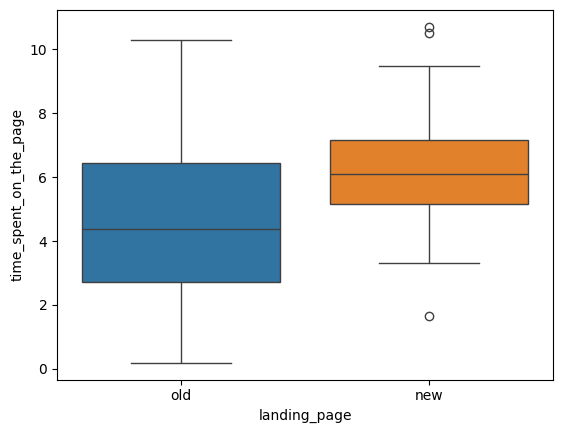

In [21]:
# Create a boxplot showing time spent on the page per old and new landing page:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', hue = 'landing_page')
plt.show()

Observation:  People spent on average more time on the new landing page than the old one.

**landing_page vs converted**

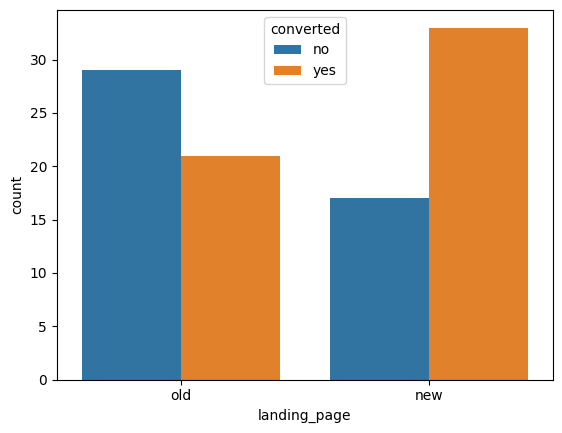

In [22]:
# Create a countplot showing the conversion rate for the old and new landing page:
sns.countplot(data=df, x='landing_page', hue='converted')
plt.show()

Observation: People on the new landing page convert in much larger numbers than people visiting the old page.

**time_spent_on_the_page vs converted**

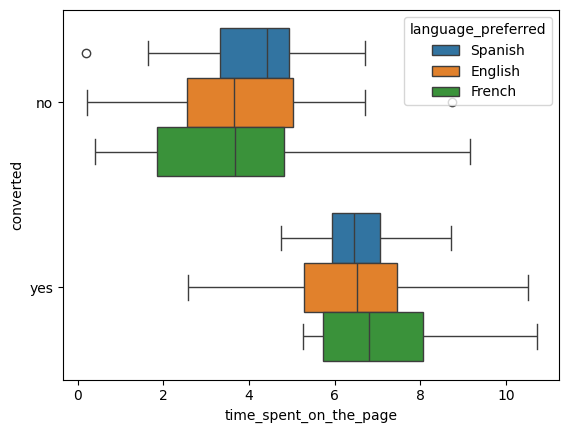

In [23]:
# Create a boxplot that shows the relationship between time spent on page, language preferred and conversion rate.
sns.boxplot(data=df, x='time_spent_on_the_page', y='converted', hue='language_preferred')
plt.show()

Observation:  This boxplot shows that all language users who converted spent more time on the page, and interesting to note that French language users who converted had the highest average time spent on the page of all language users.  

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

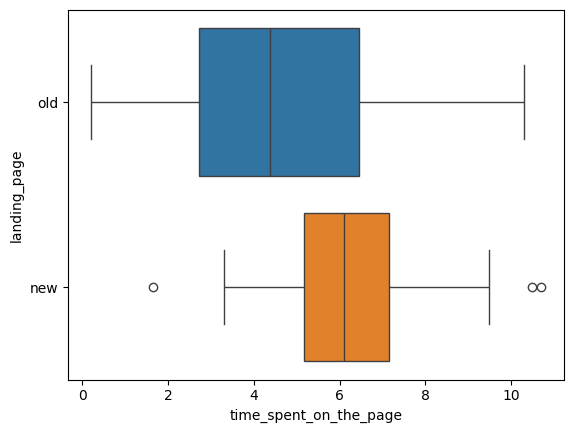

In [24]:
# Create a boxplot showing time spent on the page per old and new landing page:
sns.boxplot(data=df, x='time_spent_on_the_page', y='landing_page', hue='landing_page')
plt.show()

Observation:  Yes, users spend more time on the new landing page.

### Step 1: Define the null and alternate hypotheses

𝐻₀ : Users spend equal or less time on the new page.

𝐻𝑎: Users spend more time on the new page.



### Step 2: Select Appropriate test

This is a one-tailed test concerning two sample means from two independent populations. The population standard deviations are unknown.

*   continuous random variable (time)
*   one-tailed test
*   two sample means from two independent populations
*   population standard deviations are unknown

Based on this information, we select the following test

two sample independent t-test for comparing means with unknown variance: ttest_ind()

### Step 3: Decide the significance level

We select 𝛂 = 0.05

### Step 4: Collect and prepare data

In [25]:
# Create a new subset dataframe for new landing page users:
time_spent_new = df[df['landing_page']=='new']['time_spent_on_the_page']

# Create a new subset dataframe for old landing page users:
time_spent_old = df[df['landing_page']=='old']['time_spent_on_the_page']


In [26]:
print('The mean of the time spent on the new page is:', round(time_spent_new.mean(), 2))
print('The mean of the time spent on the old page is:', round(time_spent_old.mean(), 2))

The mean of the time spent on the new page is: 6.22
The mean of the time spent on the old page is: 4.53


In [27]:
print('The standard deviation of the time spent on the new page is:', round(time_spent_new.std(), 2))
print('The standard deviation of the time spent on the old page is:', round(time_spent_old.std(), 2))

The standard deviation of the time spent on the new page is: 1.82
The standard deviation of the time spent on the old page is: 2.58


Observation:  Based on the size of the two sample groups each being 50, the Central Limit Theorem applies (N >30), therefore the distribution of the two sample groups are normal.

### Step 5: Calculate the p-value

In [28]:
# Import the libraries to calculate p-value:
from scipy.stats import ttest_ind
from scipy.stats import norm

In [29]:
# Write the code to calculate the p-value:
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var=False, alternative = 'greater')
print('The p-value is:', p_value)

The p-value is: 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [30]:
# Print the conclusion based on p_value:
p_value = 0.0001392381225166549
if p_value < 0.05:
  print(f'As the p-value is {p_value:.4f}, it is less than the level of significance of 0.05. Therefore, we reject the null hypothesis and accept the alternative hypothesis.')
  print('Users spend more time on the new page')
else:
  print(f'As the p-value is {p_value:.4f}, it is greater than the level of significance of 0.05. Therefore, we accept the null hypothesis.')
  print('Users spend equal or less time on the new page')


As the p-value is 0.0001, it is less than the level of significance of 0.05. Therefore, we reject the null hypothesis and accept the alternative hypothesis.
Users spend more time on the new page


### Step 7:  Draw inference

Users spent more time on the new landing page.  Answer to question 1 under Objectives.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

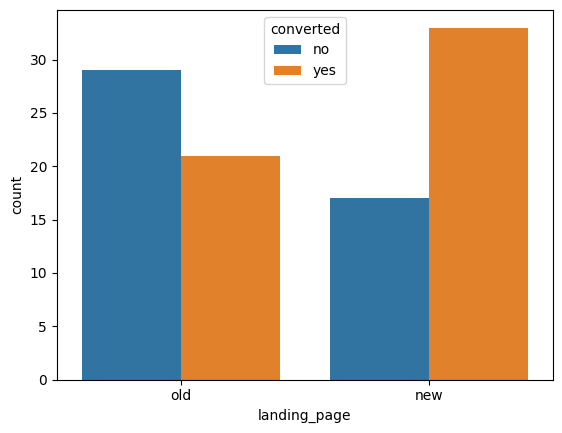

In [31]:
# Perform visual analysis:
# Create a countplot showing the conversion rate for the old and new landing page:
sns.countplot(data=df, x='landing_page', hue='converted')
plt.show()

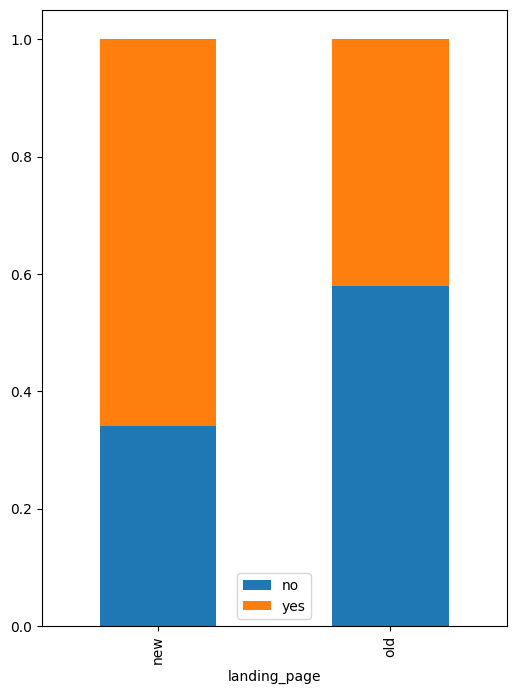

In [32]:
# Alternative visual analysis comparing the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

##Define the Null and Alternative Hypothesis and probability value:

𝐻₀: The conversion rate for new page is equal to or less than for the old page.

p_value <= 0.05

𝐻𝑎: The conversion rate for the new page is greater than for the old page.

p_value > 0.05

##Choose the appriopriate test:

1. This is a one-tailed test (𝐻𝑎 is one directional)
2. Binomally distributed population / categorical/binary data / discrete variables
3. Population standard deviation unknown.
4. Objective is to find out size of sample proportions, not so much sample means

In [33]:
#Based on this information we select the two proportional z-test:
from statsmodels.stats.proportion import proportions_ztest


##Decide the significance level:

We choose 𝛂 = 0.05

##Collect and prepare data:

In [34]:
# Create new subset dataframe for converted users using the new landing page:
#converted_new = df[df['landing_page']=='new']['converted'].value_counts()['yes']

# Create new df for converted users using the old landing page:
#converted_old = df[df['landing_page']=='old']['converted'].value_counts()['yes']

In [35]:
# Calculate the number of converted users in the treatment group using the new page:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
new_converted

np.int64(33)

In [36]:
# calculate the number of converted users in the control group using the old page:
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
old_converted


np.int64(21)

In [37]:
print(f'The number of converted users in the treatment group is {new_converted}, and in the control group {old_converted}')

The number of converted users in the treatment group is 33, and in the control group 21


In [38]:
# Total number of users using the new landing page:
total_users_treatment = df[df['group'] == 'treatment'].value_counts().sum()
total_users_treatment

np.int64(50)

In [39]:
# Total number of users using the old landing page:
total_users_control = df[df['group']=='control'].value_counts().sum()
total_users_control

np.int64(50)

In [40]:
print(f'The total number of users on the new landing page is {total_users_treatment}, and the total number on the old page is {total_users_control}')

The total number of users on the new landing page is 50, and the total number on the old page is 50


##Calculate the P-value:

In [41]:
# Write the code to calculate the p_value:
#counts = np.array([new_converted, old_converted])
#nobs = np.array([total_users_treatment, total_users_control])
#test_stat, p_value = proportions_ztest(counts, nobs, alternative = 'larger')
test_stat, p_value = proportions_ztest([new_converted, old_converted],[total_users_treatment, total_users_control], alternative='larger')
print('The p-value is:', p_value)

The p-value is: 0.008026308204056278


##Compare the p-value with 𝛂:

In [42]:
#Print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value is {p_value:.4f}, it is less than the level of significance of 0.05.  Therefore, we reject the null hypothesis and accept the alternative hypothesis.')
    print('The conversion rate for the new page is greater than for the old page')

else:
    print(f'As the p-value is {p_value:.4f}, it is greater than the level of significance of 0.05.  Therefore, we accept the null hypothesis.')
    print('The conversion rate for the new page is equal or less than for the old page')


As the p-value is 0.0080, it is less than the level of significance of 0.05.  Therefore, we reject the null hypothesis and accept the alternative hypothesis.
The conversion rate for the new page is greater than for the old page


##Draw Inference:
Users on the new landing page have a higher conversion rate.  Answer to question 2 under Objectives.

## 3. Is the conversion and preferred language are independent or related?

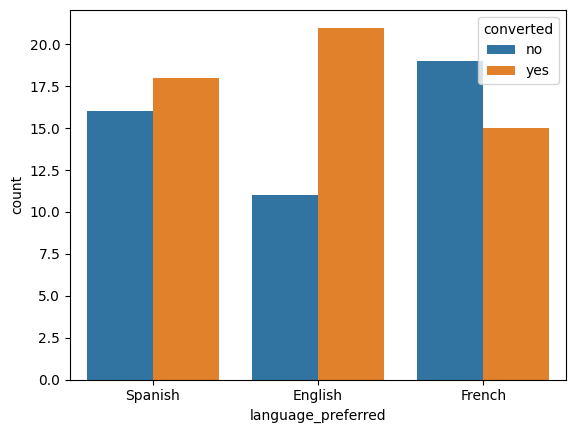

In [43]:
#Perform visual analysis:
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.show()

##Define the null and alternative hypothesis and the probability value:


𝐻₀: The conversion rate is independent from the user's preferred language

p_value = 0.05

𝐻𝑎: The conversion rate is related to the user's preferred language.

p_value > 0.05

##Determine the appropriate test:

This problem requires a test of independence, concerning two categorical variables - converted status and preferred language. Based on this information, we select chi-square test.

In [44]:
#Chi-Square test:
from scipy.stats import chi2_contingency

##Decide the significance level:

𝛂 = 0.05

##Collect and prepare data:

In [45]:
# Create a dataframe showing conversion rates per preferred language
df_conversion = pd.crosstab(df['language_preferred'], df['converted'])
df_conversion

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


##Calculate the p-value, and compare it with 𝛂:

In [46]:
#Write the code to calculate the p-value using the chi-square test:
chi2, p_value, dof, expected=chi2_contingency(df_conversion)
print('The p-value is:', p_value)

The p-value is: 0.2129888748754345


In [47]:
#Commpare p-value with 𝛂 = 0.05
if p_value < 0.05:
    print(f'As the p-value is {p_value:.4f}', 'it is less than the level of significance of 0.05, therefore we reject the null hypothesis')
else:
    print(f'The p-value is {p_value:.4f}, which is more than the level of significance of 0.05.  We therefore accept the null hypothesis.')
    print('The conversion rate is independent from the preferred language of the user.')

The p-value is 0.2130, which is more than the level of significance of 0.05.  We therefore accept the null hypothesis.
The conversion rate is independent from the preferred language of the user.


##Draw inference:


Insight:  The preferred language of the user is an independent factor in their decision to convert.  
This is the answer to question 3 under Objectives.


## 4. Is the time spent on the new page same for the different language users?

##Create visual analysis:

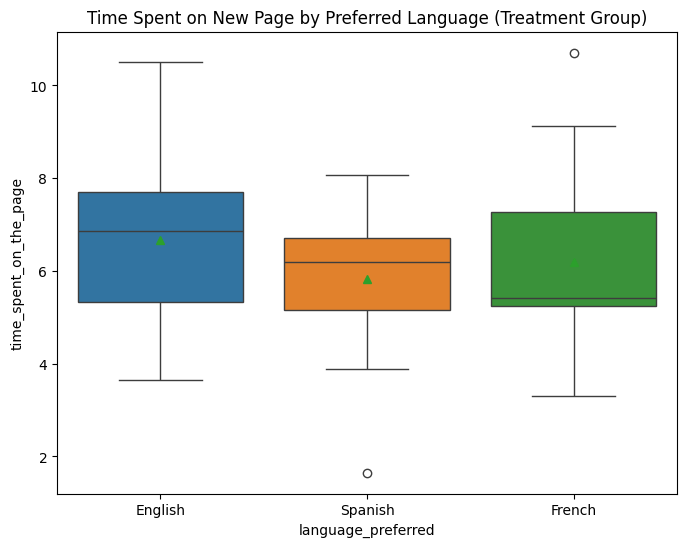

In [48]:
# Create a boxplot showing relationship between time spent on the new page and preferred language:
# First, create a new dataframe of users who were served the new landing page:
df_new = df[df['group']=='treatment']

plt.figure(figsize=(8,6))
sns.boxplot(data= df_new, x='language_preferred', y='time_spent_on_the_page', hue='language_preferred', showmeans=True)
plt.title('Time Spent on New Page by Preferred Language (Treatment Group)')
plt.show()

##Define the null and alternative hypothesis, and the p-value:

𝐻₀ : The time spent on the new page is independent from the user's preferred language.

µ1 = µ2 = µ3

𝐻𝛂 : The time spent on the new page is dependent on the user's preferred language.

At least one the means is not equal

𝛂 = 0.05

##Choose the appropriate test:
This is a testing experiment with one discreet and one continuous variable.
We are comparing three means from three different samples.

In [50]:
#Calculate the mean for time spent on the new page for each language group:
df_new.groupby(df['language_preferred'])['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


In [62]:
# We choose the one way ANOVA test:  Analysis of Variance,  a statistical method used to compare the means of three or more groups
# to determine if there is a statistically significant difference between them.

import scipy.stats as stats
from scipy.stats import f_oneway


##Determine the significance level:

𝛂 = 0.05

##Collect and prepare data:

In [63]:
# Create a subset dataframe of users of the new landing page preferring English:
time_spent_english = df_new[df_new['language_preferred']== 'English']['time_spent_on_the_page']

# Create a subset dataframe of users on the new landing page preferring Spanish:
time_spent_spanish = df_new[df_new['language_preferred']== 'Spanish']['time_spent_on_the_page']

# Create a subset dataframe of users on the new landing page preferring French:
time_spent_french = df_new[df_new['language_preferred']== 'French']['time_spent_on_the_page']



##Calculate the p-value:

In [65]:
test_stat, p_value= f_oneway(time_spent_english, time_spent_spanish, time_spent_french)
print('The p-value is:', p_value)

The p-value is: 0.43204138694325955


##Compare the p-value with 𝛂:

The p-value is 0.43, this is larger than our pre-determined significance level of 0.05.  It is therefore that we accept the null hypothesis that says that the mean of all three language groups that spent time on the new landing page, are more or less similar, at least not different in a statistically significant way.

## Conclusion and Business Recommendations

We accept the null hypothesis that the time spent on the new page is not significantly different among the three language users.  This answers question 4 under Objectives.


Objectives recap:

1: Do the users spend more time on the new landing page than on the existing landing page?

Answer: Users spend statistically significant more time on the new landing page, as compared to users spending time on the old landing page.


2: Is the conversion rate (proportion of users who visit the landing page and subscribe) for the new page greater than for the old page?

Answer: Users on the new page do in statistically significant numbers convert to a subscription.

3: Does the converted status depend on the preferred language?

Answer: The preferred language does not have statistical significance in the conversion rate.

4: Is the time spent on the new page the same for different language users?

Answer: The time spent on the new page is not significantly different among the three language users.


Conclusion:

The preferred language of users does not have an impact on the conversion rate.

The deciding factor that contributes to conversion rate is having users spend more time on the website, which is the case when they land on the new landing page, regardless what their preferred language is.

Recommendation to proceed switching to new landing page.



___